## Session 1

To obtain a representation of the style of an input image, we use a feature space originally designed to capture texture information
So basic idea is <br>
    -> We are going to use some parts of CNN<br>
    -> Extract the featrues maps for an image (whose style is to be extraced)<br>
    -> Something contains the correlations betwen the different filter responses over the spatial extent of the feature maps (rey malai tha xaina kasari or k le)<br>
    -> Basiclly extract the texture informtion but not the global arrangement

In [1]:
import torch
import torch.nn as nn

In [6]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy


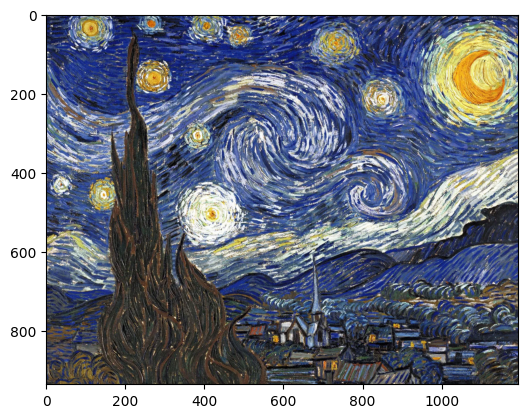

In [7]:

# Step 1: Load a real image
img_path = 'image.png'
image = Image.open(img_path).convert('RGB')



transform = transforms.Compose([
    transforms.Resize((224, 224)),    # Resize to 224x224
    transforms.ToTensor(),            # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize for pre-trained models, gives better results apparently
])

image_tensor = transform(image).unsqueeze(0)  #batch dimension (1, 3, 224, 224)


plt.imshow(image)

In [8]:

class SimpleConvNet(nn.Module):
    def __init__(self):
        super(SimpleConvNet, self).__init__()
        # Define a simple convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        return self.conv1(x)

In [9]:

model = SimpleConvNet()
filters = model.conv1.weight.data  
print(f"Filter shape: {filters.shape}") 

Filter shape: torch.Size([8, 3, 3, 3])


In [ ]:

def showfilter(nfilt, filters):
    plt.figure(figsize=(nfilt, nfilt))
    for i in range(8):  # We have 8 filters in the output channel
        plt.subplot(2, 4, i+1)
        plt.imshow(filters[i, 0].cpu().numpy(), cmap='gray') 
        plt.title(f"Filter {i+1}")
        plt.axis('off')

    plt.show()


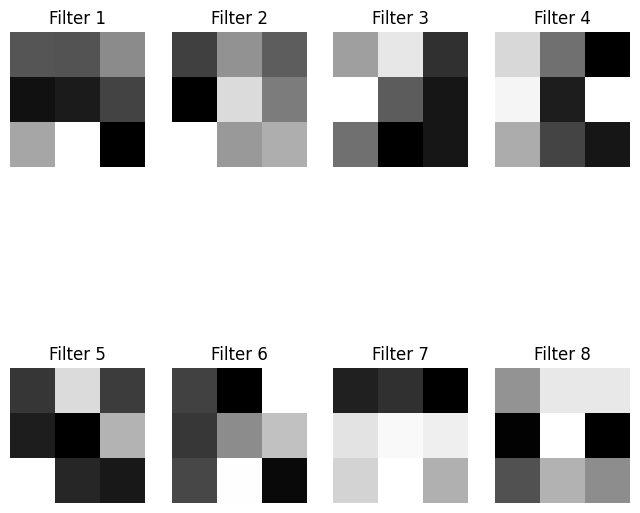

In [11]:
showfilter(8,filters)

Filters after forward pass shape: torch.Size([8, 3, 3, 3])


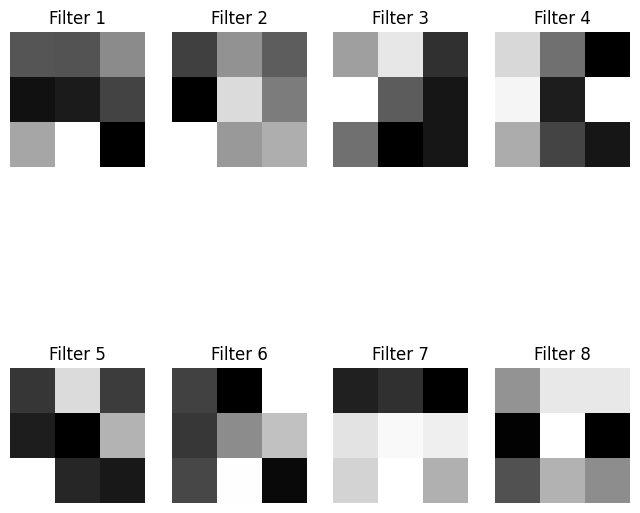

In [13]:

output = model(image_tensor)
filters_after_forward = model.conv1.weight.data
# The filters should remain aile lai ta
print(f"Filters after forward pass shape: {filters_after_forward.shape}")
showfilter(8,filters_after_forward)